# HEART FAILURE PREDICTION​
## BA Mamoudou & Lucien Medard DAHOUE, MSD 1

- *Description* : Il s'agit de la prediction des facteurs de risque de deces de crise cardiaque​.


- *Variable cible Décès  (DEATH_EVENT)* : Elle prend la valeur 1 si l'individu décède suite à une crise cardiaque et 0 sinon.

On dispose de 12 variables (feature) dont 7 variablees enumeratives​ et 6 variables categorielles​. Le nombre d'observation de la base de donnees est de 299 observations​.

- *Variables numeriques*
Age de l'individu (age)​

Taux de l'enzyme CPK dans le sang (mcg/L) (*creatinine_phosphokinasesort*)​

Pourcentage de sang quittant le cœur à chaque contraction (*ejection_fraction*)​

Plaquettes dans le sang (kiloplatelets/mL) (*platelets*)​

Taux de créatinine sérique dans le sang (mg/dL) (*serum_creatinine*)​

Taux de sodium sérique dans le sang (mEq/L) (*serum_sodium*)​

Période de suivi (jours) (*time*)

- *Variables categorielles*
Diminution des globules rouges ou de l'hémoglobine (*anaemia*)​

Patient est diabétique (*diabetes*)​

Patient souffre d'hypertension  (*high_blood_pressuresort*)​

Sexe (*sex*)​

Fumeur ou non (*smoking*)​

In [1]:
""" Importation des librairies utiles"""

import pandas as pd
from sklearn import preprocessing
import pickle
from sklearn.model_selection import train_test_split

import numpy as np # linear algebra
import sklearn
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [2]:
""" Importation de la base de donnees """
data = pd.read_csv ('dataset.csv')

"""Visualisation de l'ensemble des donnees"""
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
""" Verifier les valeurs manquantes"""
data.isnull().sum()  # Il n'y a aucune valeur manquante

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
""" Extraction et visualisation de la base de donnees des features"""
x = data.iloc[:, :-1].values 
x = pd.DataFrame(x, columns = data.iloc[:, :-1].columns)

""" Extraction de la variable cible"""
y = data.iloc[:, 12]
y = pd.DataFrame(y)


In [5]:
""" Standardisation MinMax des features pour reduire l'effet des differences d'espace des valeurs"""
from sklearn.preprocessing import MinMaxScaler
X = pd.DataFrame(MinMaxScaler().fit_transform(x),columns=x.columns)


 age : 0 outliers : []

 anaemia : 0 outliers : []

 creatinine_phosphokinase : 18 outliers : [1, 38, 52, 60, 72, 103, 134, 149, 163, 164, 171, 208, 227, 246, 250, 280, 296, 297]

 diabetes : 0 outliers : []

 ejection_fraction : 0 outliers : []

 high_blood_pressure : 0 outliers : []

 platelets : 3 outliers : [105, 109, 296]

 serum_creatinine : 16 outliers : [9, 10, 28, 31, 35, 39, 48, 52, 117, 124, 129, 131, 203, 217, 228, 282]

 serum_sodium : 1 outliers : [199]

 sex : 0 outliers : []

 smoking : 0 outliers : []

 time : 0 outliers : []
 Tous :  [1, 9, 10, 28, 31, 35, 38, 39, 48, 52, 52, 60, 72, 103, 105, 109, 117, 124, 129, 131, 134, 149, 163, 164, 171, 199, 203, 208, 217, 227, 228, 246, 250, 280, 282, 296, 296, 297]


36

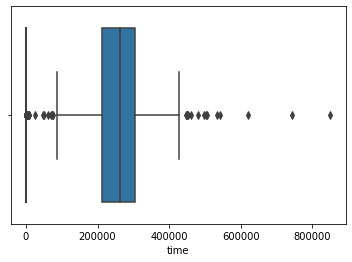

In [6]:
""" Definition d'une fonction pour detection les outliers """

def outl (X, var) : 
    import seaborn as sns
    """ Definir une fonction retournant les indices des outliers """
    sns.boxplot(data = X, x=data[var])
    q1 = X[var].quantile(0.25)
    q3 = X[var].quantile(0.75)
    iqr = q3 - q1

    outliers = []
    for i in X.index :
        if X.loc [i, var] < (q1 - 3*iqr) or X.loc [i, var] > (q3 + 3*iqr) : 
            outliers.append (i)
    return outliers

""" Detection des outliers """

Outliers = []
for i in np.arange (X.shape[1]) :  
    var = X.columns[i]
    outliers = outl (X, X.columns[i])
    Outliers.extend (outliers)
    print ('\n', X.columns[i], ':', len (outliers), 'outliers :', outliers)

Outliers.sort()
print (" Tous : ", Outliers)

"""Nombre d'outliers"""
len (list (set (Outliers)))

In [7]:
""" On supprime les outliers """
X.drop (Outliers, inplace = True)
y.drop (Outliers, inplace = True)

"""Taille des nouvelles donnees (features et variable cible)"""
X.shape, y.shape

((263, 12), (263, 1))

/home/cherif/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DEATH_EVENT
0              69.961977
1              30.038023
dtype: float64

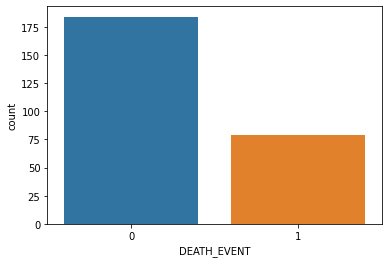

In [8]:
""" Imbalanced data """

sns.countplot(y['DEATH_EVENT'])

""" Pourcentage de chaque categorie de la variable cible"""
100*y.value_counts()/sum (y.value_counts())

<AxesSubplot:>

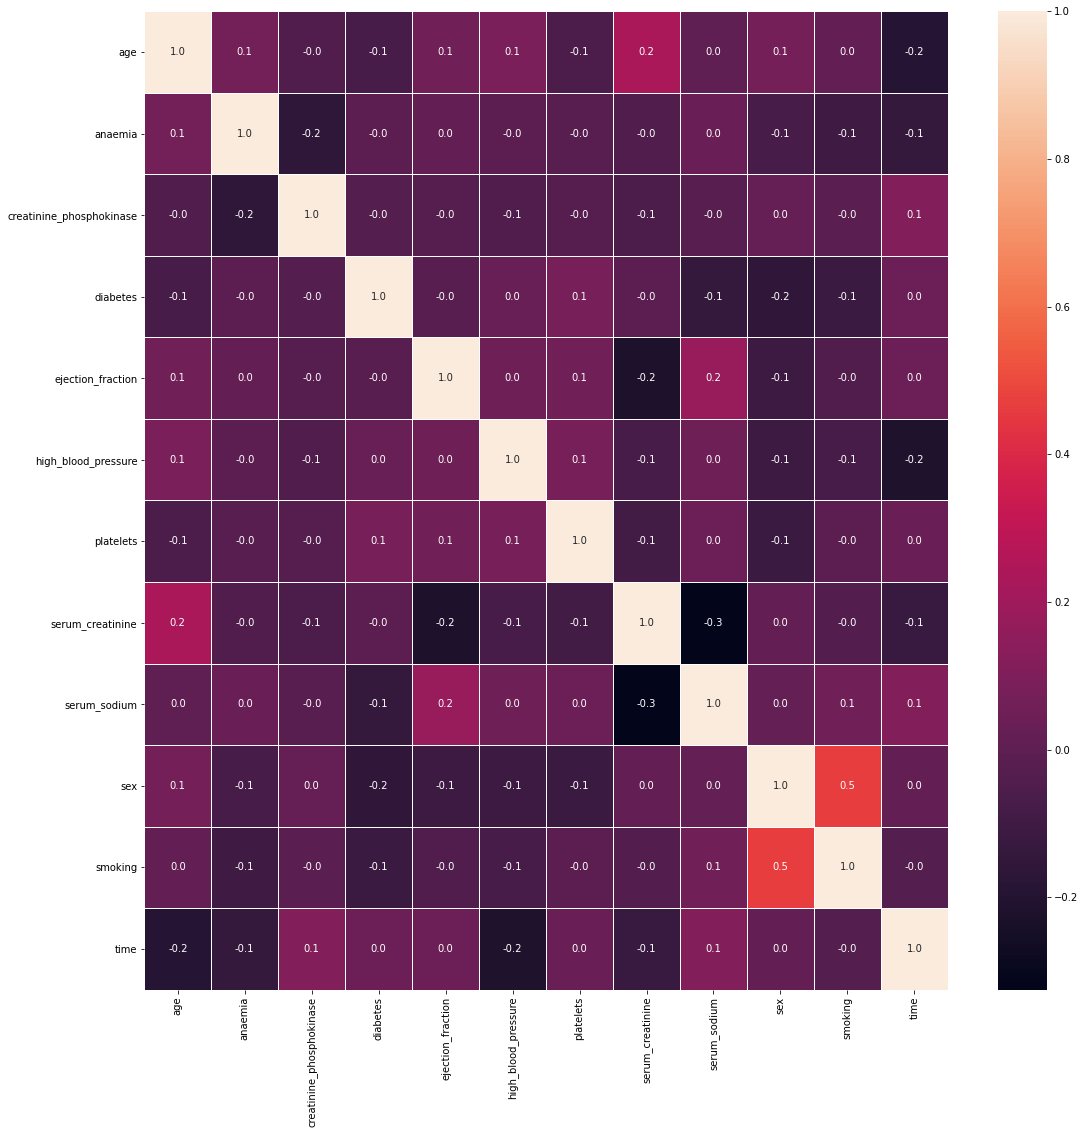

In [9]:
# Matrice de corrélation
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [10]:
""" Liste de variables a supprimer (les variables fortement correlees entre elles) """

drop_list=[]
for var in X.columns:
  if not var in drop_list:
    data_corr=X.loc[:, X.corr()[var]>0.7]
    dlist=data_corr.columns[1:]
    for i in dlist:
      if not var in drop_list:
        drop_list.append(i)
drop_list  #  Aucune variable a supprimer

[]

In [11]:
""" Imbalanced data """
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)   # 20% et 80%

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (210, 12)
Number transactions y_train dataset:  (210, 1)
Number transactions X_test dataset:  (53, 12)
Number transactions y_test dataset:  (53, 1)


In [15]:
""""Handle imbalanced """
sm = SMOTE(random_state=2)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)
X_train_new = pd.DataFrame (X_train_new, columns = X_train.columns)
y_train_new = pd.DataFrame (y_train_new, columns = y_train.columns)

Tableau de frequence : 
 DEATH_EVENT
0              50.0
1              50.0
dtype: float64


/home/cherif/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


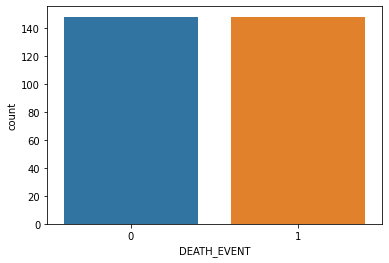

In [16]:
""" Show that the new data are balanced"""
X_train_new.shape  # 296
y_train_new.shape  # 296

sns.countplot(y_train_new['DEATH_EVENT'])
print('Tableau de frequence : \n',100*y_train_new.value_counts()/sum (y_train_new.value_counts()))


# Classification et selection du meilleur classifieur
On ppostule les models KNN, Decision Tree Regressor et SVM. On selectionne par la suite le meilleur modele en se basant sur la precision de chacun d'eux.

In [17]:
"""KNN"""

knn = KNeighborsClassifier(n_jobs=-1)
#learning
knn.fit(X_train_new, y_train_new)
#Prediction
ypred_knn=knn.predict(X_test)
#importing the metrics module
from sklearn import metrics

#evaluation(prediction1,y_test)
print("Accuracy:",knn.score(X_test, y_test))

#evaluation(Confusion Metrix)

print("Confusion Metrix balanced:\n",metrics.confusion_matrix(y_test,ypred_knn))

Accuracy: 0.660377358490566
Confusion Metrix balanced:
 [[28  8]
 [10  7]]


/home/cherif/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [18]:
"""Decision Tree Regressor"""

from sklearn.tree import DecisionTreeRegressor

DTregressor = DecisionTreeRegressor(max_depth=10, random_state=1)
DTregressor.fit(X_train_new,y_train_new)

# Calculate the training and test score
print("Decision Tree Regressor / Train score is :", DTregressor.score(X_train_new,y_train_new))
print("Decision Tree Regressor / Test score is :", DTregressor.score(X_test,y_test))


# Calculate the prediction of the model
ypred_DTr = DTregressor.predict(X_test)
print("Confusion Metrix balanced:\n",metrics.confusion_matrix(y_test,ypred_DTr))

Decision Tree Regressor / Train score is : 1.0
Decision Tree Regressor / Test score is : 0.39379084967320266
Confusion Metrix balanced:
 [[32  4]
 [ 3 14]]


In [19]:
""" Random Forest Regressor """

from sklearn.ensemble import RandomForestRegressor

RFregressor = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=1)
RFregressor.fit(X_train_new,y_train_new)

# Calculate the training and test score
print("Random Forest Regressor / Train score is :", RFregressor.score(X_train_new,y_train_new))
print("Random Forest Regressor / Test score is :", RFregressor.score(X_test,y_test))
print("Random Forest Regressor / N° of features  are : ", RFregressor.n_features_)
print("Important features are : " , RFregressor.feature_importances_)


# Calculate the prediction of the model
ypred_RFr = RFregressor.predict(X_test)

<ipython-input-19-d0ce09045935>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFregressor.fit(X_train_new,y_train_new)


Random Forest Regressor / Train score is : 0.6724412097737844
Random Forest Regressor / Test score is : 0.6424518831318627
Random Forest Regressor / N° of features  are :  12
Important features are :  [4.12706968e-02 2.06187950e-03 2.70856310e-02 4.73052055e-04
 8.47552433e-02 0.00000000e+00 6.89994930e-03 1.91324175e-01
 4.15558714e-02 1.54168432e-03 0.00000000e+00 6.03031817e-01]


In [20]:
""" SVM """

from sklearn.svm import SVR

SVMregressor = SVR(kernel='linear')
SVMregressor.fit(X_train_new, y_train_new)

# Calculate the training and test score
print("SVM regressor / Train score is :", SVMregressor.score(X_train_new,y_train_new))
print("SVM regressor / Test score is :", SVMregressor.score(X_test,y_test))

# Calculate the prediction of the model
ypred_SVMr = SVMregressor.predict(X_test)

SVM regressor / Train score is : 0.45765006056615054
SVM regressor / Test score is : 0.3854521920048498


/home/cherif/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [21]:
""" Ici on resume les precision de chaque model,le meilleur modele est le KNN. On l'utilise par la suite pour predire de nouvelles valeurs """

knn_score = knn.score (X_test, y_test)
print ("KNN Accuracy: \n", knn_score)
dtr_score = DTregressor.score (X_test, y_test)
print ("Decision Tree Regressor Accuracy: \n",dtr_score)
svm_score = SVMregressor.score (X_test, y_test)
print ("SVM Accuracy : \n", svm_score)

KNN Accuracy: 
 0.660377358490566
Decision Tree Regressor Accuracy: 
 0.39379084967320266
SVM Accuracy : 
 0.3854521920048498


In [22]:
### Saving the best model ###
max_score = max(knn_score, dtr_score, svm_score)
print(max_score)   # Pour le KNN

0.660377358490566


In [23]:
""" La nouvelle classe a predire utilise les valeurs de 12 features """
X_test.shape

(53, 12)

# Prediction d'une nouvelle valeur
On utilise ici le knn pour prédire une nouvelle observation (une ligne du nouveau dataset Xtest). 'indice' designe la ligne choisie et correspond aux entrée pour un individu donné (les valeurs des features). On peut faire varier donc 'indice'.

In [24]:
indice = int(input ("Saisir l'indice de l'entrée à prédire : "))   # L'indice designe le numero de ligne (comptage a partir de 0 en python) de l'individu dans la base X_test, on peut faire varier indice (0-54)

Saisir l'indice de l'entrée à prédire : 5


In [25]:
""" Utilisation du KNN pour predire une nouvelle valeur"""
new_observation = pd.DataFrame(X_test.iloc[indice])    # Selection de la ligne indice (les observations d'un individu)
new_observation=new_observation.T   # Pour le ramener dans la meme dimension que les donnees d'entrainement

ypred_knn = knn.predict(new_observation)   #Prediction de la nouvelle observation a l'indice 'indice'

if ypred_knn == 0 :
  print ('Est décédé')
elif ypred_knn == 1 :
  print ('A survécu')


Est décédé


In [26]:
### Saving the best model ###
max_score = max(knn_score, dtr_score, svm_score)
print(max_score)   # Pour le KNN
# Saving model to disk
pickle.dump(knn, open('model.pkl','wb'))

0.660377358490566
